## Вступление

Эта работа посвящена рассмотрению понятия асимптотической сложности алгоритмов на конкретных примерах. Грубо говоря, асимптотическая сложность алгоритма — это количество операций, из которых этот алгоритм состоит. В ходе работы вы напишете несколько различных алгоритмов, которые в силу различной вычислительной сложности будут выполняться за разное количество времени.


## Начало работы

Эта работа выполняется при помощи **Jupyter Notebook** — интерактивной «тетрадки», которая позволяет хранить текст, код, графики и т.д.

Первым делом подключим необходимые нам модули:

In [ ]:
import util
import matplotlib
import random
import math
%matplotlib inline

Мы не будем детально останавливаться на том, за что именно отвечают эти модули, поскольку к самой работе это имеет весьма опосредованное отношение.

# Задача «для разогрева»

### Задание №1: числа Фибоначчи

Напишите рекурсивную реализацию функции, вычисляющей числа Фибоначчи. Для этого допишите тело функции ниже:

In [ ]:
def recursive_fib(n):
    if n == 1:
        return 1
    elif n ==0:
        return 0
    return recursive_fib(n-1) + recursive_fib(n-2)

Проверьте, что функция работает корректно:

In [ ]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

Теперь напишите рекурсивную реализацию, но с использованием дополнительного массива в роли кэша, в котором хранятся уже вычисленные значения:

In [ ]:
def recursive_fib_with_cache(n, cache=None):
    if n == 1:
        return 1
    elif n ==0:
        return 0
    cache = dict()
    if n in cache.keys():
        return cache[n]
    else:
        cache[n] = recursive_fib_with_cache(n-1, cache) + recursive_fib_with_cache(n-2,cache)
    return cache[n]

Убедитесь, что функция работает корректно:

In [ ]:
assert recursive_fib(0) == 0
assert recursive_fib(1) == 1
assert recursive_fib(9) == 34

И, наконец, напишите нерекурсивную реализацию функции:

In [ ]:
def fib(n):
    f = [0,1]
    for i in range(n):
        f[1],f[0] = f[0]+f[1], f[1]
    return f[0]

Проверьте правильность реализации:

In [ ]:
assert fib(0) == 0
assert fib(1) == 1
assert fib(9) == 34

А теперь давайте посмотрим на скорость работы написанных выше функций:

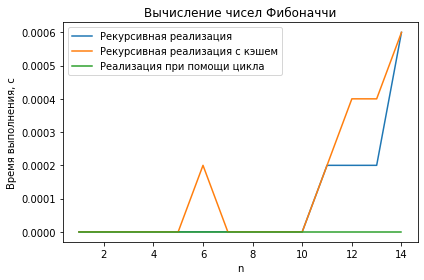

In [ ]:
util.plot_fib_results(
    ('Рекурсивная реализация', recursive_fib),
    ('Рекурсивная реализация с кэшем', recursive_fib_with_cache),
    ('Реализация при помощи цикла', fib)
)

Можно видеть, что самой быстрой является реализация при помощи цикла.
**Вопрос**: какова асимптотическая сложность реализованных алгоритмов?

# Сортировки

Здесь и далее мы предполагаем, что все функции сортировки упорядочивают исходный массив по возрастания. Функции сортировки в этой работе должны изменять переданный массив, а не возвращать новый.

### Задание №2: сортировка пузырьком

Напишите обычную реализацию сортировки пузырьком:

In [ ]:
def bubble_sort(a):
        for j in range(len(a)):
            for i in range(1, len(a)):

                if a[i-1] > a[i]:


                    a[i-1], a[i] = a[i], a[i-1]


Убедитесь, что сортировка написана верно:

In [ ]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

Особенность обычной реализации пузырьковой сортировки состоит в том, что она «не замечает» отсортированности массива. Это означает, что даже если массив уже отсортирован, алгоритм всё равно будет выполнен от начала и до конца. Чтобы этого избежать, можно добавить специальный флаг, показывающий, была ли за прошлый проход выполнена хоть одна перестановка. Если перестановок не было, значит, массив уже отстортирован. Напишите улучшенную реализацию сортировки пузырьком:

In [ ]:
def bubble_sort_adaptive(a):
        for j in range(len(a)):
            chec = a.copy()
            for i in range(1, len(a)):

                if a[i-1] > a[i]:


                    a[i-1], a[i] = a[i], a[i-1]

            if chec == a:
                break

Проверьте свою реализацию:

In [ ]:
a = [5, 4, 3, 2, 1]
bubble_sort(a)
assert util.is_sorted(a)

А теперь сравните скорость работы двух реализаций одного алгоритма при различных входных данных:

In [15]:
util.plot_bubble_sort_results(
    ('Обычная реализация', bubble_sort),
    ('Реализация с проверкой на отсортированность', bubble_sort_adaptive)
)

KeyboardInterrupt: 

**Вопрос**: какие выводы можно сделать из полученных результатов?

### Задание №3: быстрая сортировка

Напишите реализацию быстрой сортировки, использую первый элемент в качестве опорного.

In [ ]:
def quick_sort_first(a):
    pass

Проверьте свою реализацию:

In [ ]:
a = [5, 4, 3, 2, 1]
quick_sort_first(a)
assert util.is_sorted(a)

Как вы знаете, скорость работы алгоритма быстрой сортировки напрямую зависит от способа выбора опорного элемента. Поэтому реализуем ещё два варианта. Сначала будем выбирать в качестве опорного элемента средний:

In [ ]:
def quick_sort_middle(a):
    pass

Проверяем реализацию:

In [ ]:
a = [5, 4, 3, 2, 1]
quick_sort_middle(a)
assert util.is_sorted(a)

А теперь в качестве опорного элемента выбираем произвольный элемент (при помощи вызова `random.choice(a)`):

In [ ]:
def quick_sort_random(a):
    pass

Проверяем реализацию:

In [ ]:
a = [5, 4, 3, 2, 1]
quick_sort_random(a)
assert util.is_sorted(a)

Сравним скорости работы трёх реализаций на различных входных данных:

In [ ]:
util.plot_quick_sort_results(
    ('Первый элемент в качестве опорного', quick_sort_first),
    ('Средний элемент в качестве опорного', quick_sort_middle),
    ('Произвольный элемент в качестве опорного', quick_sort_random)
)

**Вопрос**: какую асимптотическую сложность имеют эти реализации на разных входных данных? Чем это объясняется?

### Задание №4: сортировка слиянием

Напишите реализацию сортировки слиянием:

In [ ]:
def merge(a, b):
    pass


def merge_sort(a):
    pass

Проверьте корректность реализации:

In [ ]:
a = [5, 4, 3, 2, 1]
merge_sort(a)
assert util.is_sorted(a)

А теперь сравним скорость работы трёх написанных нами алгоритмов:

In [ ]:
util.plot_sort_results(
    ('Быстрая сортировка: произвольный элемент в качестве опорного', quick_sort_random),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: обычная реализация', bubble_sort),
)
util.plot_sort_results(
    ('Быстрая сортировка: первый элемент в качестве опорного', quick_sort_first),
    ('Сортировка слиянием', merge_sort),
    ('Сортировка пузырьком: пеализация с проверкой на отсортированность', bubble_sort),
)

**Вопрос**: какие выводы можно сделать из полученных результатов? В чём принципиальное отличие сортировки слиянием от двух других рассмотренных?

# Поиск элемента

Теперь перейдём к алгоритмам поиска элемента в массиве.

### Задание №5: линейный поиск

Для начала напишите самую простую реализацию поиска — линейный поиск элемента в массиве:

In [ ]:
def search(a, x):
    pass

Проверьте корректность реализации:

In [ ]:
assert search([1, 2, 3, 4, 5], 5)  == 4
assert search([1, 2, 3, 4, 5], 3)  == 2

Когда нам ничего не известно о данных, которые находятся в массиве, придумать какой-то более эффективный алгоритм достаточно сложно. Но если мы знаем какую-то дополнительную информацию о природе данных в массиве, то можно написать более эффективные алгоритмы.

### Задание №6: двоичный поиск

Если массив упорядочен, то для такого массива можно написать эффективный алгоритм поиска — двоичный (или *бинарный*) поиск. Напишите реализацию этого алгоритма:

In [ ]:
def binary_search(a, x):
    pass

Проверьте корректность реализации:

In [ ]:
assert binary_search([1, 2, 3, 4, 5], 5)  == 4
assert binary_search([1, 2, 3, 4, 5], 3)  == 2
assert binary_search([1, 2, 3, 4, 5], 1)  == 0

### Задание №7: интерполяционный поиск

Если кроме упорядоченности про массив известно, как именно возрастают (убывают) в нём элементы, то алгоритм двоичного поиска можно существенно улучшить. Вместо деления отрезка пополам можно выполнить интерполяцию и получить приблизительное положение элемента в массиве. Такая модификация будет называться *интерполяционным поиском*. Напишите реализацию алгоритма интерполяционного поиска, предполагая, что элементы в массиве возрастают линейно:

In [ ]:
def interpolation_search(a, x):
    pass

Проверьте свою реализацию:

In [ ]:
assert interpolation_search([1, 2, 3, 4, 5], 5)  == 4
assert interpolation_search([1, 2, 3, 4, 5], 3)  == 2
assert interpolation_search([1, 2, 3, 4, 5], 1)  == 0

Сравните скорость работы трёх алгоритмов поиска на разных входных данных:

In [ ]:
util.plot_search_results_small(
    ('Линейный поиск', search),
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)
util.plot_search_results_huge(
    ('Бинарный поиск', binary_search),
    ('Интерполяционный поиск', interpolation_search),
)

**Вопрос**: что можно сказать об алгоритме интерполяционного поиска? Когда имеет смысл его применять?

## Дополнительное задание

Если у вас осталось время, то напишите реализацию сортировки слияением с разбиением исходного массива на 3 части. Сравните скорость работы двух реализаций.